# Portfolio Project: Mental Health Trends in the Tech Industry
**Analyst:** Alain  
**Tools:** R (Tidyverse, ggplot2), Google Colab  
**Goal:** Analyzing how workplace culture, remote work, and company scale impact mental health in the tech sector.

### 1. Executive Summary
As a former TV commercial Producer transitioning into **Data Analysis**, I am exploring how environmental structures influence human behavior. This project performs an Exploratory Data Analysis (EDA) on the OSMI Mental Health in Tech Survey.

**Key Questions:**
* Does remote work lead to higher rates of mental health treatment seeking?
* How do cultural differences (Country) and company scale impact these trends?

In [ ]:
install.packages("janitor")
library(tidyverse)
library(readr)
library(dplyr)
library(janitor)

# Load the data
data_raw <- read_csv("survey.csv")

# Print the original column names to verify
print(colnames(data_raw))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Rows: 1259 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (25): Gender, Country, state, self_employed, family_history, treatment,...
dbl   (1): Age
dttm  (1): Times

 [1] "Timestamp"                 "Age"                      
 [3] "Gender"                    "Country"                  
 [5] "state"                     "self_employed"            
 [7] "family_history"            "treatment"                
 [9] "work_interfere"            "no_employees"             
[11] "remote_work"               "tech_company"             
[13] "benefits"                  "care_options"             
[15] "wellness_program"          "seek_help"                
[17] "anonymity"                 "leave"                    
[19] "mental_health_consequence" "phys_health_consequence"  
[21] "coworkers"                 "supervisor"               
[23] "mental_health_interview"   "phys_health_interview"    
[25] "mental_vs_physical"        "obs_consequence"          
[27] "comments"                 


### 2. Data Cleaning & Preprocessing
Survey data is notoriously "noisy." Here, I am:
1.  **Filtering Age:** Removing outliers (only keeping ages 18-75).
2.  **Standardizing Gender:** Recoding the mess of text entries into three clean categories.
3.  **Selecting Features:** Focusing on variables relevant to remote work and company structure.

[1] "--- Null Value Report ---"
# A tibble: 8 × 3
  variable     null_count percent_null
  <chr>             <int>        <dbl>
1 age                   0            0
2 gender                0            0
3 country               0            0
4 remote_work           0            0
5 no_employees          0            0
6 treatment             0            0
7 benefits              0            0
8 gender_clean          0            0
[1] "Cell 5 execution complete. Data is cleaned and nulls are mapped."


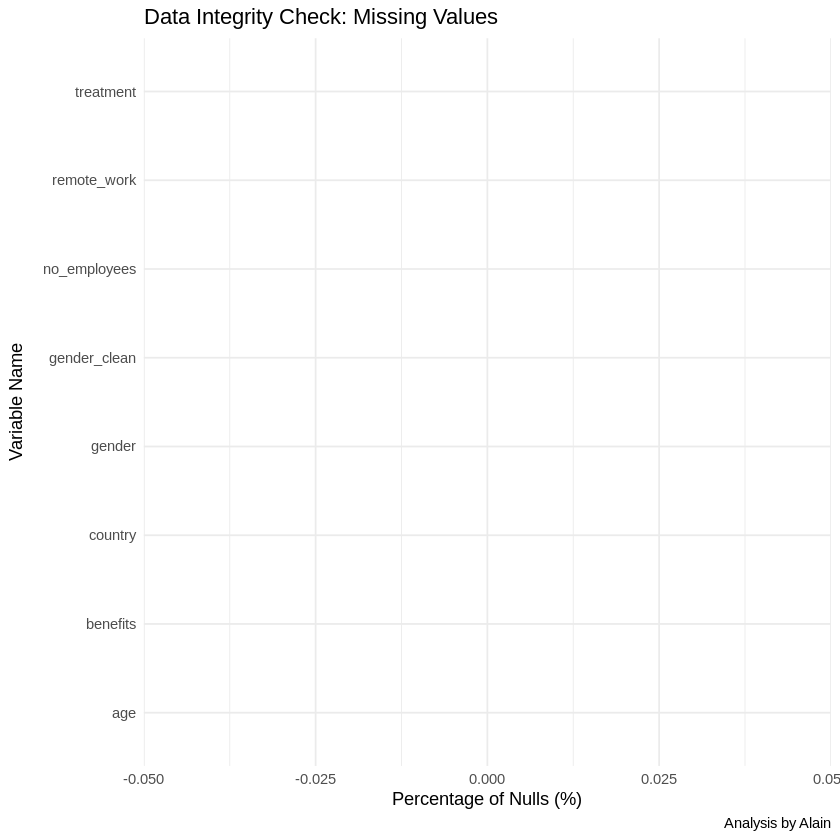

In [ ]:
# 2. Re-build data_cleaned with all necessary columns from your data_raw
data_cleaned <- data_raw %>%
  # Filter for realistic ages (Standard EDA practice)
  filter(Age >= 18 & Age <= 75) %>%
  # Select the 7 key variables for our analysis
  select(Age, Gender, Country, remote_work, no_employees, treatment, benefits)

# 3. Standardize Column Names (Lowercase for easy coding)
# We use Base R here for maximum reliability
colnames(data_cleaned) <- tolower(colnames(data_cleaned))

# 4. Clean up whitespace in 'no_employees' (Fixes the justification/formatting issue)
data_cleaned <- data_cleaned %>%
  mutate(no_employees = str_trim(no_employees))

# 5. Standardize Gender entries into three clean categories
data_cleaned <- data_cleaned %>%
  mutate(gender_clean = case_when(
    str_to_lower(gender) %in% c("male", "m", "male-ish", "maile", "cis male", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr", "cis man") ~ "Male",
    str_to_lower(gender) %in% c("female", "f", "trans-female", "woman", "female (cis)", "femail", "cis female", "femake", "female ", "cis-female/femme") ~ "Female",
    TRUE ~ "Other/Non-Binary"
  ))

# 6. Set Company Size as an Ordered Factor (Crucial for Tableau/GGPlot sorting)
data_cleaned$no_employees <- factor(data_cleaned$no_employees,
                               levels = c("1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"))

# --- NULL VALUE ANALYSIS SECTION ---

# 7. Generate a Null Value Report using janitor-style logic
null_report <- data_cleaned %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "null_count") %>%
  mutate(percent_null = round((null_count / nrow(data_cleaned)) * 100, 2))

# Print the report to the console
print("--- Null Value Report ---")
print(null_report)

# 8. Visualize the Missing Data
ggplot(null_report, aes(x = reorder(variable, -percent_null), y = percent_null)) +
  geom_bar(stat = "identity", fill = "#D55E00") +
  coord_flip() +
  labs(title = "Data Integrity Check: Missing Values",
       x = "Variable Name",
       y = "Percentage of Nulls (%)",
       caption = "Analysis by Alain") +
  theme_minimal()

print("Cell 5 execution complete. Data is cleaned and nulls are mapped.")

# A tibble: 8 × 3
  column       null_count percent_null
  <chr>             <int>        <dbl>
1 age                   0            0
2 gender                0            0
3 country               0            0
4 remote_work           0            0
5 no_employees          0            0
6 treatment             0            0
7 benefits              0            0
8 gender_clean          0            0


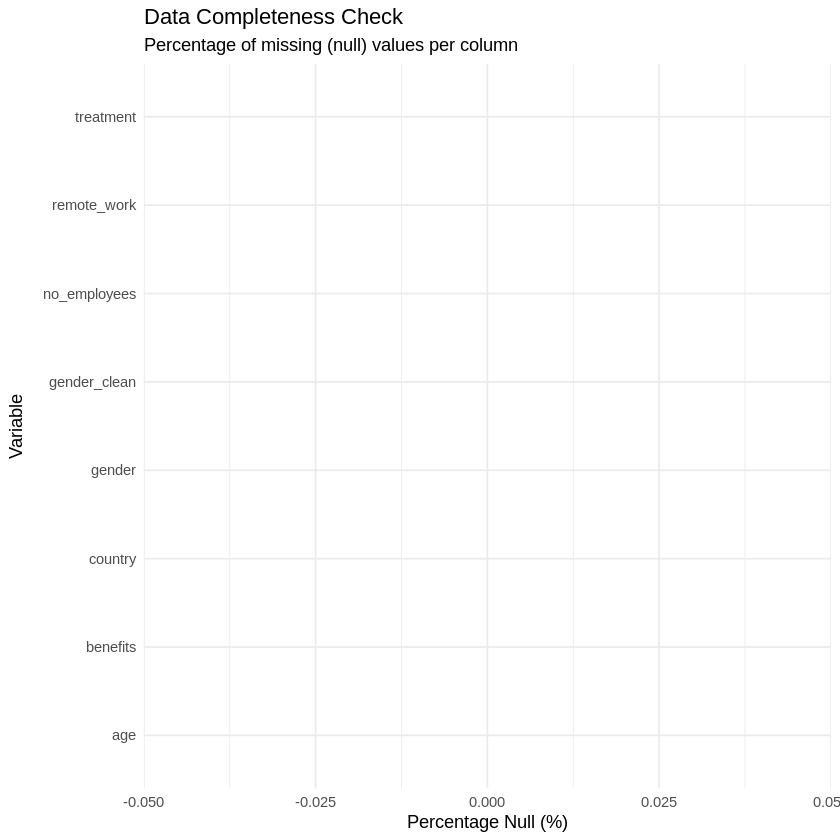

In [ ]:
# 2. Identify missing values specifically
null_counts <- data_cleaned %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "column", values_to = "null_count") %>%
  mutate(percent_null = (null_count / nrow(data_cleaned)) * 100)

# 3. Print the report
print(null_counts)

# 4. Visualize the "Gaps"
ggplot(null_counts, aes(x = reorder(column, -percent_null), y = percent_null)) +
  geom_bar(stat = "identity", fill = "#D55E00") +
  coord_flip() +
  labs(title = "Data Completeness Check",
       subtitle = "Percentage of missing (null) values per column",
       x = "Variable",
       y = "Percentage Null (%)") +
  theme_minimal()

In [ ]:
str(data_raw)

spc_tbl_ [1,259 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Timestamp                : POSIXct[1:1259], format: "2014-08-27 11:29:31" "2014-08-27 11:29:37" ...
 $ Age                      : num [1:1259] 37 44 32 31 31 33 35 39 42 23 ...
 $ Gender                   : chr [1:1259] "Female" "M" "Male" "Male" ...
 $ Country                  : chr [1:1259] "United States" "United States" "Canada" "United Kingdom" ...
 $ state                    : chr [1:1259] "IL" "IN" NA NA ...
 $ self_employed            : chr [1:1259] NA NA NA NA ...
 $ family_history           : chr [1:1259] "No" "No" "No" "Yes" ...
 $ treatment                : chr [1:1259] "Yes" "No" "No" "Yes" ...
 $ work_interfere           : chr [1:1259] "Often" "Rarely" "Rarely" "Often" ...
 $ no_employees             : chr [1:1259] "6-25" "More than 1000" "6-25" "26-100" ...
 $ remote_work              : chr [1:1259] "No" "No" "No" "No" ...
 $ tech_company             : chr [1:1259] "Yes" "No" "Yes" "Yes" ...
 $ benefits    

### 3. Impact of Remote Work
Our primary focus is whether remote workers seek treatment more frequently than those in traditional office settings.

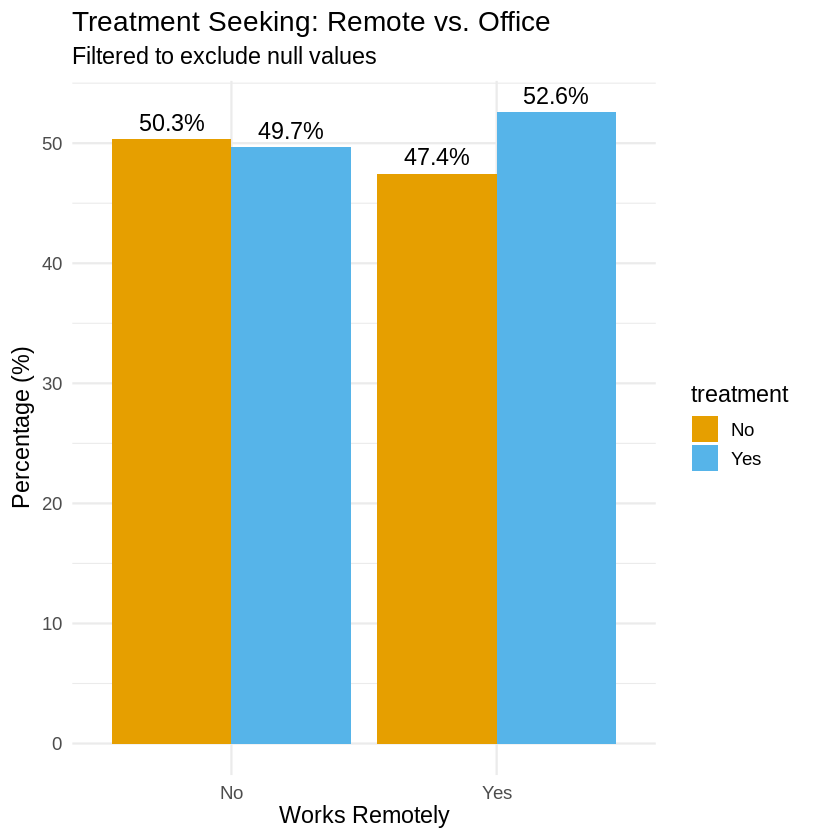

In [ ]:
viz_remote <- data_cleaned %>%
  # Filter out rows where remote_work or treatment is missing
  filter(!is.na(remote_work) & !is.na(treatment)) %>%
  group_by(remote_work, treatment) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(remote_work) %>%
  mutate(percentage = count / sum(count) * 100)

ggplot(viz_remote, aes(x = remote_work, y = percentage, fill = treatment)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = "Treatment Seeking: Remote vs. Office",
       subtitle = "Filtered to exclude null values",
       x = "Works Remotely",
       y = "Percentage (%)") +
  theme_minimal(base_size = 14) +
  scale_fill_manual(values = c("#E69F00", "#56B4E9"))

### 4. Cultural Comparison (Top 5 Countries)
As an analyst with a multilingual background (English, French, German), I am interested in how geographic context influences these trends. Here we facet the data by the most represented nations.

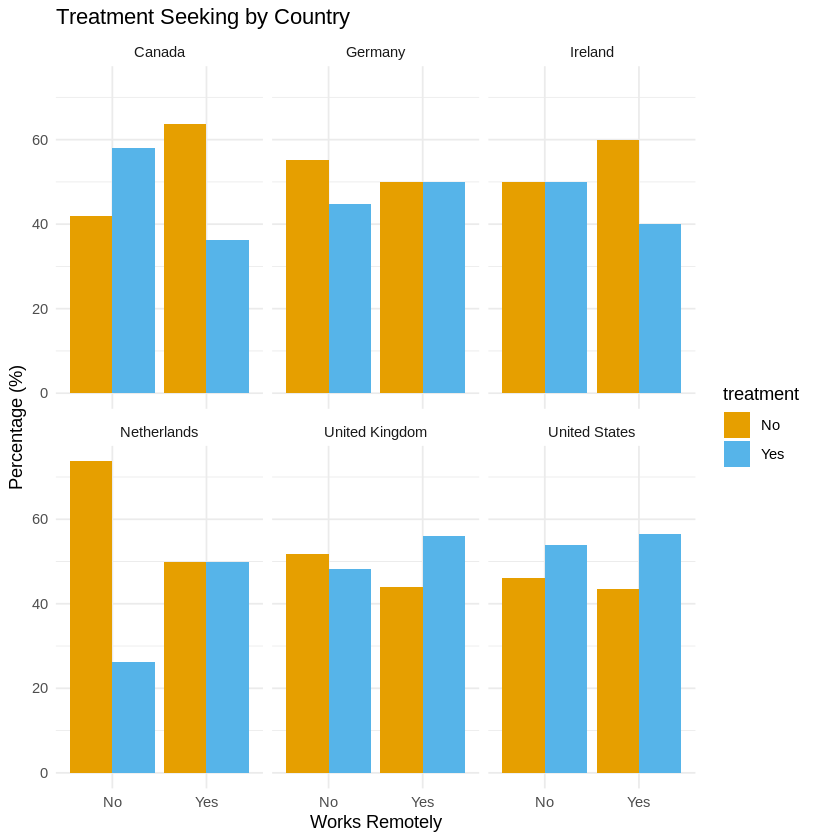

In [ ]:
# Identify top 5 countries by response count
top_countries <- data_cleaned %>%
  count(country, sort = TRUE) %>%
  top_n(5, n) %>%
  pull(country)

data_cleaned %>%
  # Ensure we only plot rows with valid Country and Treatment data
  filter(country %in% top_countries, !is.na(treatment)) %>%
  group_by(country, remote_work, treatment) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(country, remote_work) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  ggplot(aes(x = remote_work, y = percentage, fill = treatment)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~country) +
  theme_minimal() +
  scale_fill_manual(values = c("#E69F00", "#56B4E9")) +
  labs(title = "Treatment Seeking by Country", x = "Works Remotely", y = "Percentage (%)")

### 5. The Scale Effect: Company Size
Does the size of a tech company influence the likelihood of an employee seeking help? Larger corporations often have more formalized benefits compared to startups.

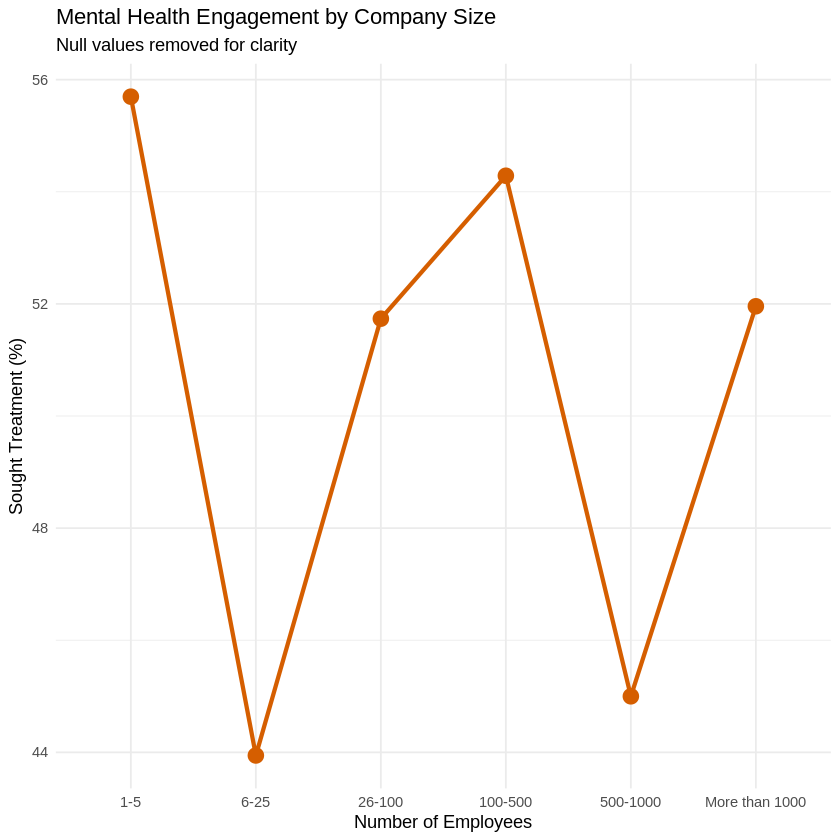

In [ ]:
# Analyze by Company Size (using the ordered factor from Cell 5)
data_cleaned %>%
  # Filter out NAs for company size
  filter(!is.na(no_employees), !is.na(treatment)) %>%
  group_by(no_employees, treatment) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(no_employees) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  filter(treatment == "Yes") %>%
  ggplot(aes(x = no_employees, y = percentage, group = 1)) +
  geom_line(color = "#D55E00", linewidth = 1.2) +
  geom_point(size = 4, color = "#D55E00") +
  labs(title = "Mental Health Engagement by Company Size",
       subtitle = "Null values removed for clarity",
       x = "Number of Employees",
       y = "Sought Treatment (%)") +
  theme_minimal()

### 6. Final Insights & Next Steps
* **Standardization:** Successfully standardized gender and filtered age outliers to ensure data integrity.
* **Global Context:** The USA and UK lead in responses; remote work trends show variation across different national cultures.
* **Business Insight:** Company scale appears to correlate with mental health engagement.
* **Portfolio Integration:** The final cleaned dataset is ready for advanced visualization in **Tableau Public**.

In [ ]:
# 1. Save the final cleaned data to the Colab environment
write.csv(data_cleaned, "Alain_Mental_Health_Cleaned.csv", row.names = FALSE)

# 2. Print a success message
print("File 'Alain_Mental_Health_Cleaned.csv' has been created.")

[1] "File 'Alain_Mental_Health_Cleaned.csv' has been created."
